<a href="https://colab.research.google.com/github/nidhicodes4045/datascience442/blob/main/CSC442_EDA_nrgrover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
#Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import geopandas as gp

time: 695 µs (started: 2025-04-01 04:38:40 +00:00)


In [175]:
#Reading the dataset as a dataframe
df0 = pd.read_csv("https://raw.githubusercontent.com/nidhicodes4045/datascience442/refs/heads/main/merged_data.csv")
pd.set_option('display.max_columns', None)
# Dropping useless column
df0 = df0.drop(['Unnamed: 0'], axis = 1)
df0.head()

,County,Population,State,mergedkeycol,Housing Data.Residing in Group Quarters,Housing Data.Total Housing Units,Vehicle Access.1 Mile,Vehicle Access.1/2 Mile,Vehicle Access.10 Miles,Vehicle Access.20 Miles,Low Access Numbers.Children.1 Mile,Low Access Numbers.Children.1/2 Mile,Low Access Numbers.Children.10 Miles,Low Access Numbers.Children.20 Miles,Low Access Numbers.Low Income People.1 Mile,Low Access Numbers.Low Income People.1/2 Mile,Low Access Numbers.Low Income People.10 Miles,Low Access Numbers.Low Income People.20 Miles,Low Access Numbers.People.1 Mile,Low Access Numbers.People.1/2 Mile,Low Access Numbers.People.10 Miles,Low Access Numbers.People.20 Miles,Low Access Numbers.Seniors.1 Mile,Low Access Numbers.Seniors.1/2 Mile,Low Access Numbers.Seniors.10 Miles,Low Access Numbers.Seniors.20 Miles,Age.Percent 65 and Older,Age.Percent Under 18 Years,Age.Percent Under 5 Years,Education.Bachelor's Degree or Higher,Education.High School or Higher,Employment.Nonemployer Establishments,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.Native Hawaiian and Other Pacific Islander Alone,Ethnicities.Two or More Races,Ethnicities.White Alone,Ethnicities.White Alone\t not Hispanic or Latino,Housing.Homeownership Rate,Housing.Households,Housing.Housing Units,Housing.Median Value of Owner-Occupied Units,Housing.Persons per Household,Income.Median Houseold Income,Income.Per Capita Income,Miscellaneous.Foreign Born,Miscellaneous.Land Area,Miscellaneous.Language Other than English at Home,Miscellaneous.Living in Same House +1 Years,Miscellaneous.Manufacturers Shipments,Miscellaneous.Mean Travel Time to Work,Miscellaneous.Percent Female,Miscellaneous.Veterans,Population.2020 Population,Population.2010 Population,Population.Population per Square Mile,Sales.Accommodation and Food Services Sales,Sales.Retail Sales,Employment.Firms.Total,Employment.Firms.Women-Owned,Employment.Firms.Men-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned
0,autaugacounty,54571,al,autaugacountyal,455,20221,834,1045,222.0,0,9973,13281,1199,0,12067,15518,2307,0,37424.0,49497,5119,0,4393,5935.0,707,0,16.0,23.2,5.9,26.6,88.5,3350.0,0.5,1.2,20.1,3.0,0.1,1.9,76.3,73.8,73.3,21397.0,23896.0,154500.0,2.56,58731,29819,2.3,594.44,4.3,87.9,665897.0,24.4,51.5,5272.0,58805,54571,91.8,93431.0,607854.0,2949,1093,1499,616.0,2160,285,2401
1,baldwincounty,182265,al,baldwincountyal,2307,73180,1653,2178,32.0,0,30633,38278,516,0,38848,48117,846,0,132442.0,165616,2308,0,21828,27241.0,390,0,21.0,21.3,5.4,31.9,90.8,20047.0,0.8,1.1,8.8,4.7,0.1,1.9,87.4,83.2,75.2,80930.0,119412.0,197900.0,2.59,58320,32626,3.7,1589.78,5.4,88.3,1438760.0,26.9,51.5,19663.0,231767,182265,114.6,560602.0,3145789.0,19732,6505,10935,2130.0,16893,2364,16183
2,barbourcounty,27457,al,barbourcountyal,3193,9820,545,742,201.0,0,3701,4943,791,0,9290,11901,2440,0,16444.5,23762,4643,0,2537,3348.0,629,0,19.7,20.6,5.3,11.6,73.2,1329.0,0.7,0.5,48.2,4.5,0.2,1.2,49.2,45.5,60.9,9345.0,12080.0,90700.0,2.41,32525,18473,2.7,884.88,7.1,85.5,735098.0,22.4,47.1,1328.0,25223,27457,31.0,26157.0,206477.0,1687,760,755,657.0,941,147,1445
3,bibbcounty,22915,al,bibbcountyal,2224,7953,312,441,0.0,0,4198,4824,90,0,6480,8349,102,0,17560.0,20989,365,0,2262,2630.0,72,0,16.7,20.3,5.6,10.4,79.1,1101.0,0.5,0.2,21.3,2.8,0.1,1.2,76.8,74.4,74.4,6891.0,9261.0,92800.0,2.99,47542,20778,1.5,622.58,2.3,89.7,117488.0,29.7,46.7,1433.0,22293,22915,36.8,10136.0,118871.0,1310,254,958,205.0,1050,288,967
4,blountcounty,57322,al,blountcountyal,489,21578,752,822,0.0,0,12575,13583,0,0,18188,19806,0,0,50848.0,54933,0,0,7114,7810.0,0,0,18.7,22.9,5.9,13.1,80.5,3710.0,0.6,0.3,1.7,9.7,0.1,1.4,95.8,86.8,78.8,20847.0,24517.0,127800.0,2.74,49358,24747,4.5,644.78,8.2,93.4,342971.0,34.4,50.8,3417.0,59134,57322,88.9,27146.0,298745.0,4550,1400,2746,368.0,4011,353,4030


time: 392 ms (started: 2025-04-01 04:38:40 +00:00)


In [176]:
#Looking at the columns in the DF
df0.columns

Index(['County', 'Population', 'State', 'mergedkeycol',
       'Housing Data.Residing in Group Quarters',
       'Housing Data.Total Housing Units', 'Vehicle Access.1 Mile',
       'Vehicle Access.1/2 Mile', 'Vehicle Access.10 Miles',
       'Vehicle Access.20 Miles', 'Low Access Numbers.Children.1 Mile',
       'Low Access Numbers.Children.1/2 Mile',
       'Low Access Numbers.Children.10 Miles',
       'Low Access Numbers.Children.20 Miles',
       'Low Access Numbers.Low Income People.1 Mile',
       'Low Access Numbers.Low Income People.1/2 Mile',
       'Low Access Numbers.Low Income People.10 Miles',
       'Low Access Numbers.Low Income People.20 Miles',
       'Low Access Numbers.People.1 Mile',
       'Low Access Numbers.People.1/2 Mile',
       'Low Access Numbers.People.10 Miles',
       'Low Access Numbers.People.20 Miles',
       'Low Access Numbers.Seniors.1 Mile',
       'Low Access Numbers.Seniors.1/2 Mile',
       'Low Access Numbers.Seniors.10 Miles',
       'Low Acce

time: 3.35 ms (started: 2025-04-01 04:38:40 +00:00)


In [177]:
#Code to get query runtime
%%time
#Filtering out the ethnicity and food access columns
columns_of_interest = df0.filter(like='Ethnicities').columns.to_list() + df0.filter(regex='^Low Access Numbers.People').columns.to_list()
print(columns_of_interest)
filtered_df = df0[columns_of_interest]
df_concat = pd.concat([filtered_df, df0['mergedkeycol']], axis=1)
df_concat = pd.concat([filtered_df, df0['Population']], axis=1)

['Ethnicities.American Indian and Alaska Native Alone', 'Ethnicities.Asian Alone', 'Ethnicities.Black Alone', 'Ethnicities.Hispanic or Latino', 'Ethnicities.Native Hawaiian and Other Pacific Islander Alone', 'Ethnicities.Two or More Races', 'Ethnicities.White Alone', 'Ethnicities.White Alone\t not Hispanic or Latino', 'Low Access Numbers.People.1 Mile', 'Low Access Numbers.People.1/2 Mile', 'Low Access Numbers.People.10 Miles', 'Low Access Numbers.People.20 Miles']
CPU times: user 6.34 ms, sys: 0 ns, total: 6.34 ms
Wall time: 6.41 ms
time: 9.46 ms (started: 2025-04-01 04:38:40 +00:00)


In [178]:
#Add the merged and the population cols
df_concat.head()

,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.Native Hawaiian and Other Pacific Islander Alone,Ethnicities.Two or More Races,Ethnicities.White Alone,Ethnicities.White Alone\t not Hispanic or Latino,Low Access Numbers.People.1 Mile,Low Access Numbers.People.1/2 Mile,Low Access Numbers.People.10 Miles,Low Access Numbers.People.20 Miles,Population
0,0.5,1.2,20.1,3.0,0.1,1.9,76.3,73.8,37424.0,49497,5119,0,54571
1,0.8,1.1,8.8,4.7,0.1,1.9,87.4,83.2,132442.0,165616,2308,0,182265
2,0.7,0.5,48.2,4.5,0.2,1.2,49.2,45.5,16444.5,23762,4643,0,27457
3,0.5,0.2,21.3,2.8,0.1,1.2,76.8,74.4,17560.0,20989,365,0,22915
4,0.6,0.3,1.7,9.7,0.1,1.4,95.8,86.8,50848.0,54933,0,0,57322


time: 47.5 ms (started: 2025-04-01 04:38:40 +00:00)


In [179]:
#Getting the number of rows and columns

print(df_concat.shape)
df_concat.head()

(3138, 13)


,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.Native Hawaiian and Other Pacific Islander Alone,Ethnicities.Two or More Races,Ethnicities.White Alone,Ethnicities.White Alone\t not Hispanic or Latino,Low Access Numbers.People.1 Mile,Low Access Numbers.People.1/2 Mile,Low Access Numbers.People.10 Miles,Low Access Numbers.People.20 Miles,Population
0,0.5,1.2,20.1,3.0,0.1,1.9,76.3,73.8,37424.0,49497,5119,0,54571
1,0.8,1.1,8.8,4.7,0.1,1.9,87.4,83.2,132442.0,165616,2308,0,182265
2,0.7,0.5,48.2,4.5,0.2,1.2,49.2,45.5,16444.5,23762,4643,0,27457
3,0.5,0.2,21.3,2.8,0.1,1.2,76.8,74.4,17560.0,20989,365,0,22915
4,0.6,0.3,1.7,9.7,0.1,1.4,95.8,86.8,50848.0,54933,0,0,57322


time: 48.7 ms (started: 2025-04-01 04:38:40 +00:00)


In [180]:
#Convert this col to int from float. May interfere with calculations later.
df_concat['Low Access Numbers.People.1 Mile'] = df_concat['Low Access Numbers.People.1 Mile'].astype(int)

#Drop white not hispanic or latino. Interferes with calc. No real output.
df_concat = df_concat.drop(['Ethnicities.White Alone\t not Hispanic or Latino'], axis=1)
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138 entries, 0 to 3137
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Ethnicities.American Indian and Alaska Native Alone           3138 non-null   float64
 1   Ethnicities.Asian Alone                                       3138 non-null   float64
 2   Ethnicities.Black Alone                                       3138 non-null   float64
 3   Ethnicities.Hispanic or Latino                                3138 non-null   float64
 4   Ethnicities.Native Hawaiian and Other Pacific Islander Alone  3138 non-null   float64
 5   Ethnicities.Two or More Races                                 3138 non-null   float64
 6   Ethnicities.White Alone                                       3138 non-null   float64
 7   Low Access Numbers.People.1 Mile                              3138 no

In [181]:
#Function to convert a column to a percentage by dividing by population column
#and storing the %age in a new column
def convert_to_percentage(df, column_name):
    df[f'{column_name} Percentage'] = (df[column_name] / df['Population']) * 100
    return df

# Apply the function to all columns starting with 'Low Access Numbers.People'
for column in df_concat.columns:
    if column.startswith('Low Access Numbers.People'):
        df_concat = convert_to_percentage(df_concat, column)

#Check
df_concat.head()

,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.Native Hawaiian and Other Pacific Islander Alone,Ethnicities.Two or More Races,Ethnicities.White Alone,Low Access Numbers.People.1 Mile,Low Access Numbers.People.1/2 Mile,Low Access Numbers.People.10 Miles,Low Access Numbers.People.20 Miles,Population,Low Access Numbers.People.1 Mile Percentage,Low Access Numbers.People.1/2 Mile Percentage,Low Access Numbers.People.10 Miles Percentage,Low Access Numbers.People.20 Miles Percentage
0,0.5,1.2,20.1,3.0,0.1,1.9,76.3,37424,49497,5119,0,54571,68.578549,90.702021,9.380440,0.0
1,0.8,1.1,8.8,4.7,0.1,1.9,87.4,132442,165616,2308,0,182265,72.664527,90.865498,1.266288,0.0
2,0.7,0.5,48.2,4.5,0.2,1.2,49.2,16444,23762,4643,0,27457,59.890010,86.542594,16.910078,0.0
3,0.5,0.2,21.3,2.8,0.1,1.2,76.8,17560,20989,365,0,22915,76.631028,91.595025,1.592843,0.0
4,0.6,0.3,1.7,9.7,0.1,1.4,95.8,50848,54933,0,0,57322,88.705907,95.832316,0.000000,0.0


time: 45.2 ms (started: 2025-04-01 04:38:40 +00:00)


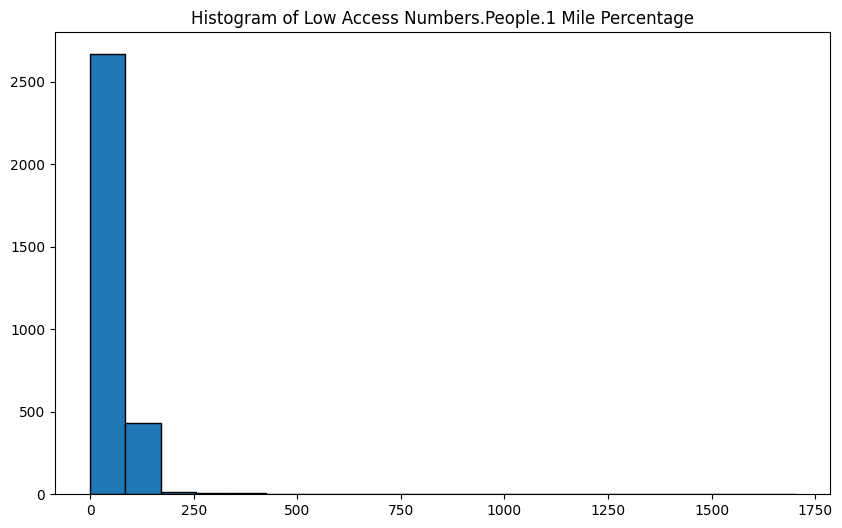

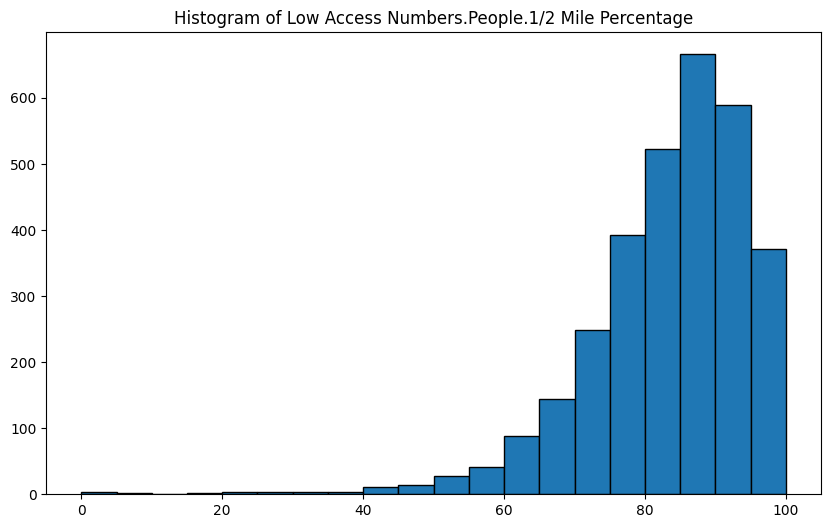

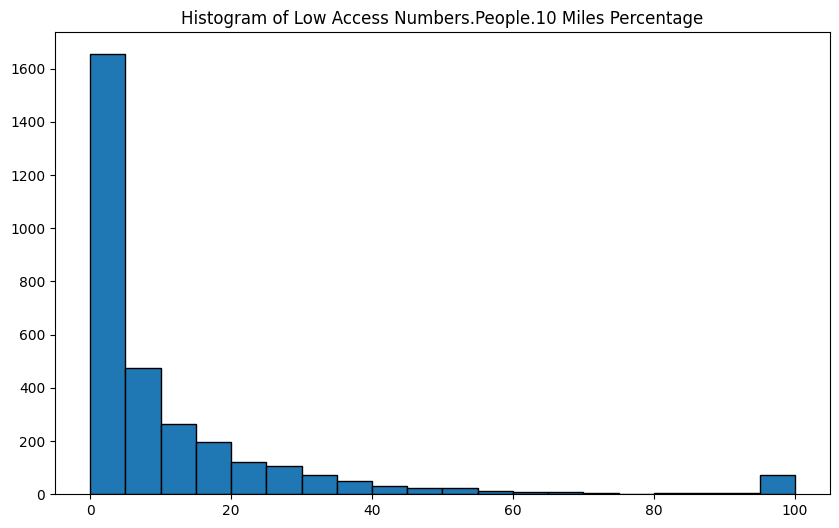

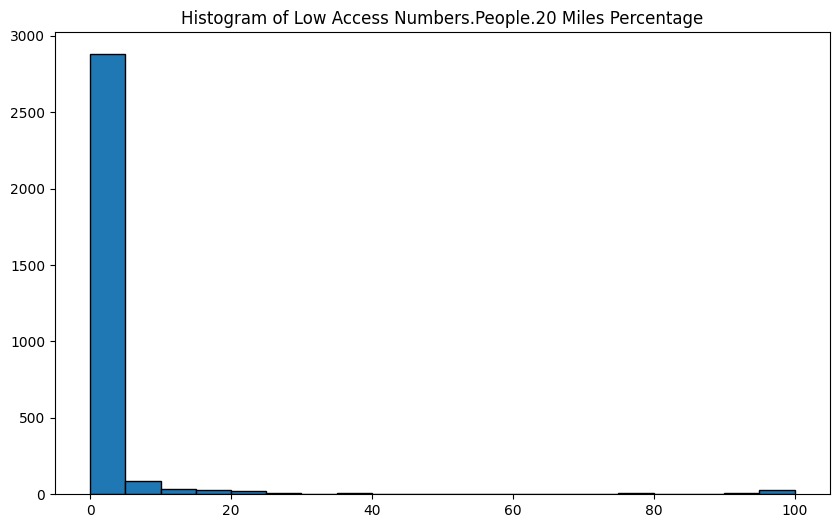

time: 689 ms (started: 2025-04-01 04:38:40 +00:00)


In [182]:
#Function to create a histogram given a column name
def create_histogram(column_name):
    plt.figure(figsize=(10, 6))
    plt.hist(df_concat[column_name], bins=20, edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.show()

#Apply the function to all dataframe columns containing
for column in df_concat.columns:
    if column.endswith('Percentage'):
        create_histogram(column)

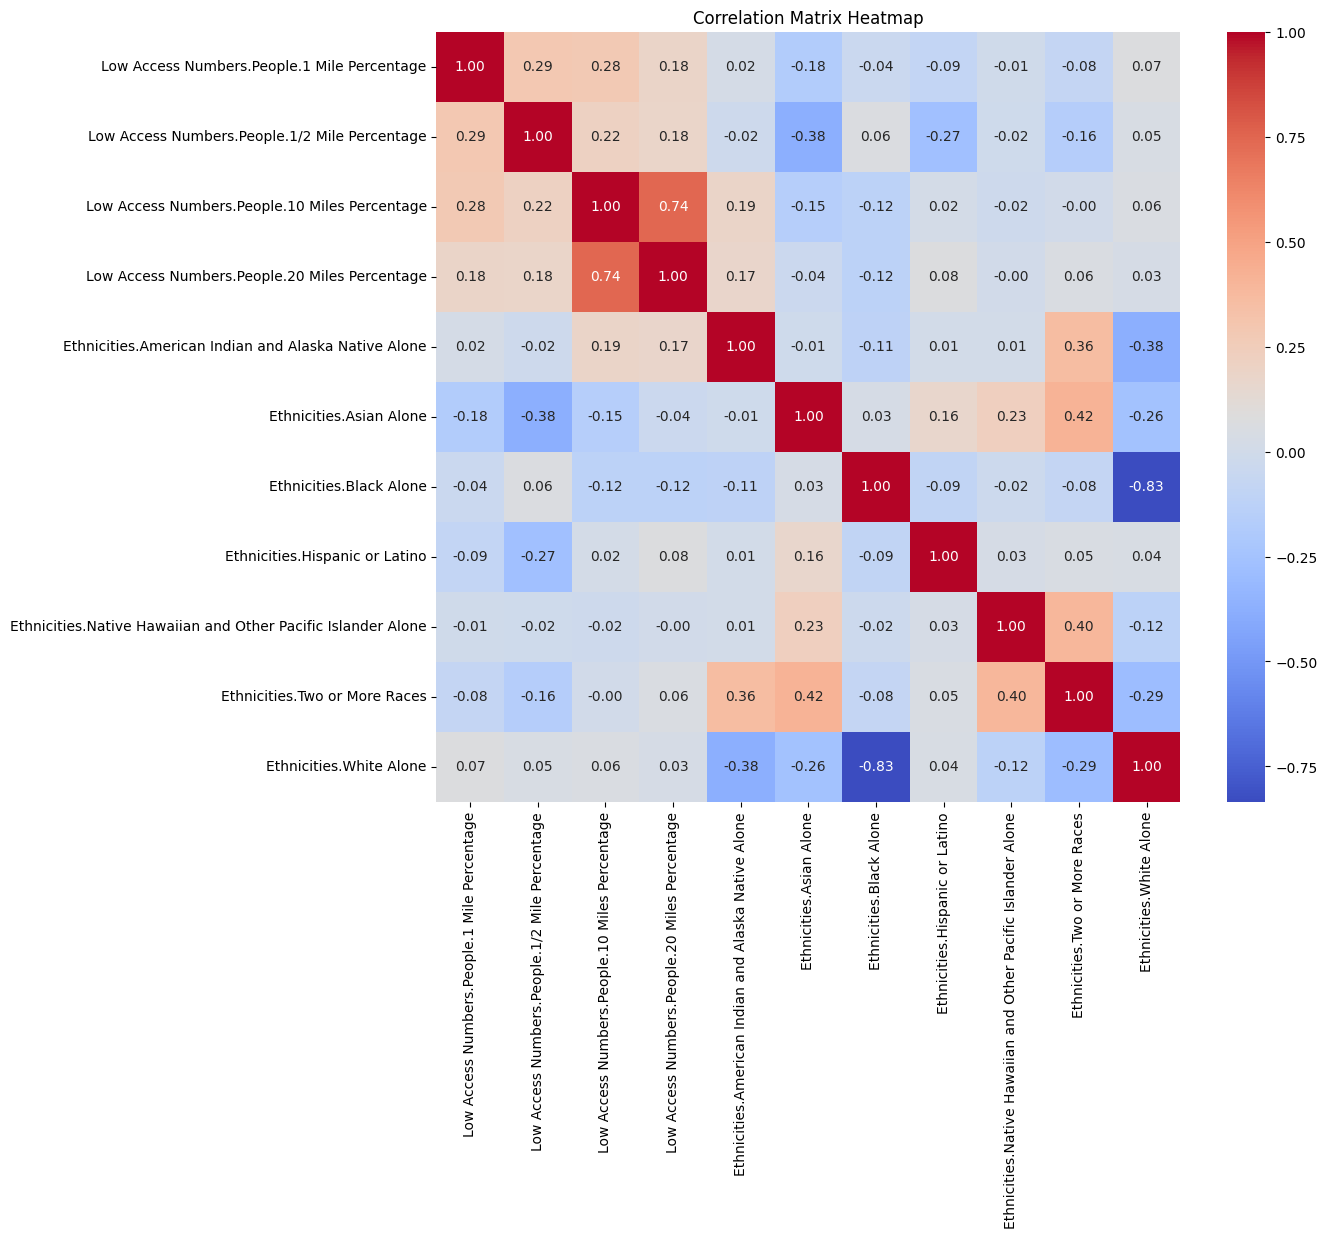

time: 646 ms (started: 2025-04-01 04:38:41 +00:00)


In [183]:
#Get a subframe with only the percentage and the ethnicities columns
percentage_columns = df_concat.filter(like='Percentage').columns
ethnicity_columns = df_concat.filter(like='Ethnicities').columns
percentage_df = df_concat[percentage_columns.tolist() + ethnicity_columns.tolist()]
percentage_df.head()

#Generate a correlation matrix heatmap for the subframe
corr_matrix = percentage_df.corr()
plt.figure(figsize=(12, 10))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [184]:
#Correlation matrix reveals very little.
#Calculate the majority ethnicity in each county and count how many times each ethnicity
#is reported
ethnicity_columns = df_concat.filter(like='Ethnicities').columns

df_concat['Max Ethnicity Column'] = df_concat[ethnicity_columns].idxmax(axis=1)
df_concat['Max Ethnicity Column'].value_counts()

,count
Max Ethnicity Column,
Ethnicities.White Alone,2990
Ethnicities.Black Alone,114
Ethnicities.American Indian and Alaska Native Alone,29
Ethnicities.Asian Alone,3
Ethnicities.Native Hawaiian and Other Pacific Islander Alone,1
Ethnicities.Hispanic or Latino,1


time: 11.3 ms (started: 2025-04-01 04:38:42 +00:00)


In [185]:
#Calculate the summary statistics for each of the low access numbers grouped
#by the max ethnicity column
low_access_columns = df_concat.filter(regex='^Low.*Percentage$').columns
summary_stats = df_concat.groupby('Max Ethnicity Column')[low_access_columns].describe()
summary_stats

Low Access Numbers.People.1 Mile Percentage  \
                                                                                         count   
Max Ethnicity Column                                                                             
Ethnicities.American Indian and Alaska Native A...                                        29.0   
Ethnicities.Asian Alone                                                                    3.0   
Ethnicities.Black Alone                                                                  114.0   
Ethnicities.Hispanic or Latino                                                             1.0   
Ethnicities.Native Hawaiian and Other Pacific I...                                         1.0   
Ethnicities.White Alone                                                                 2990.0   

                                                                           \
                                                          mean        std   
Max Ethnicity Column                                                        
Ethnicities.American Indian and Alaska Native A...   78.896391  47.349042   
Ethnicities.Asian Alone                              60.795014  33.380462   
Ethnicities.Black Alone                              65.201364  25.586932   
Ethnicities.Hispanic or Latino                        0.556491        NaN   
Ethnicities.Native Hawaiian and Other Pacific I...  100.000000        NaN   
Ethnicities.White Alone                              68.209566  54.716527   

                                                                            \
                                                           min         25%   
Max Ethnicity Column                                                         
Ethnicities.American Indian and Alaska Native A...   40.824940   62.500000   
Ethnicities.Asian Alone                              27.163984   44.232954   
Ethnicities.Black Alone                               3.357516   54.310528   
Ethnicities.Hispanic or Latino                        0.556491    0.556491   
Ethnicities.Native Hawaiian and Other Pacific I...  100.000000  100.000000   
Ethnicities.White Alone                               0.000000   51.127467   

                                                                            \
                                                           50%         75%   
Max Ethnicity Column                                                         
Ethnicities.American Indian and Alaska Native A...   73.429395   80.469143   
Ethnicities.Asian Alone                              61.301924   77.610529   
Ethnicities.Black Alone                              67.928763   79.871860   
Ethnicities.Hispanic or Latino                        0.556491    0.556491   
Ethnicities.Native Hawaiian and Other Pacific I...  100.000000  100.000000   
Ethnicities.White Alone                              65.956713   78.966487   

                                                                 \
                                                            max   
Max Ethnicity Column                                              
Ethnicities.American Indian and Alaska Native A...   310.205622   
Ethnicities.Asian Alone                               93.919134   
Ethnicities.Black Alone                              175.402667   
Ethnicities.Hispanic or Latino                         0.556491   
Ethnicities.Native Hawaiian and Other Pacific I...   100.000000   
Ethnicities.White Alone                             1700.517063   

                                                   Low Access Numbers.People.1/2 Mile Percentage  \
                                                                                           count   
Max Ethnicity Column                                                                               
Ethnicities.American Indian and Alaska Native A...                                          29.0   
Ethnicities.Asian Alone                                         

time: 88 ms (started: 2025-04-01 04:38:42 +00:00)


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ethnicities.White Alone'),
  Text(1, 0, 'Ethnicities.Black Alone'),
  Text(2, 0, 'Ethnicities.Asian Alone'),
  Text(3, 0, 'Ethnicities.American Indian and Alaska Native Alone'),
  Text(4, 0, 'Ethnicities.Native Hawaiian and Other Pacific Islander Alone'),
  Text(5, 0, 'Ethnicities.Hispanic or Latino')])

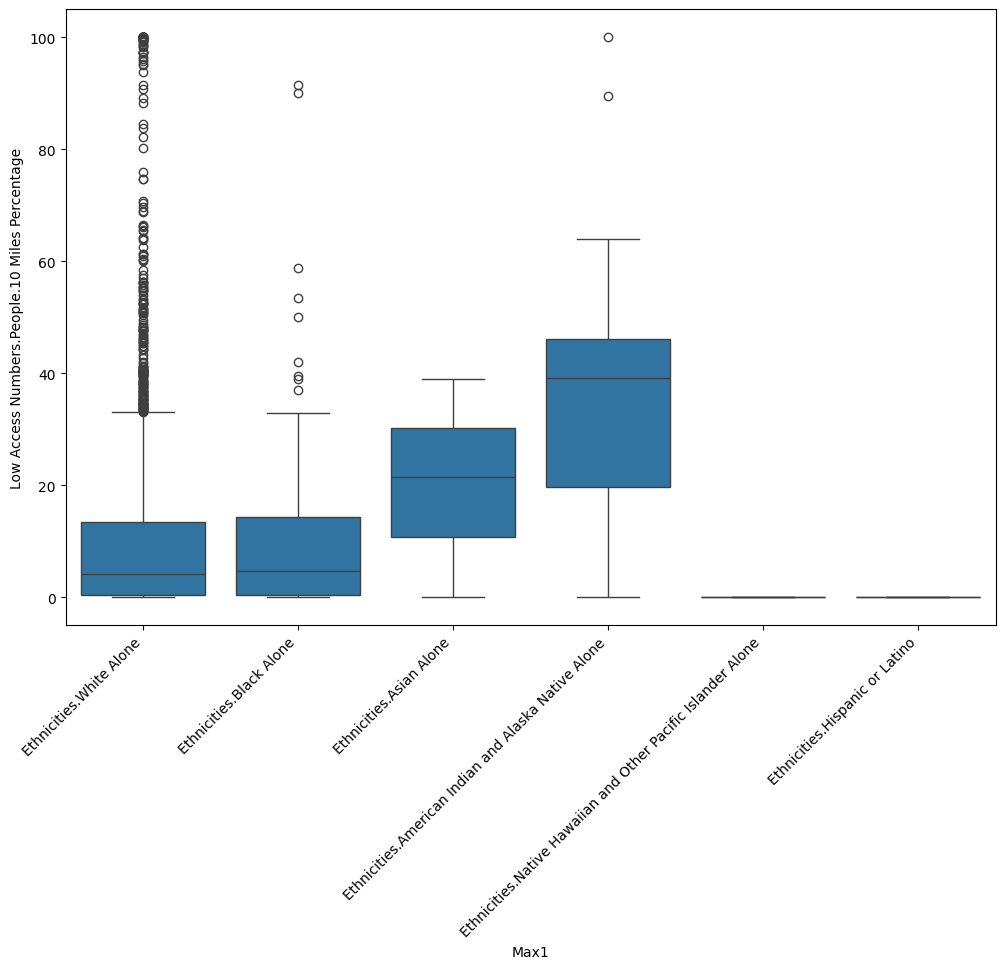

time: 280 ms (started: 2025-04-01 05:08:03 +00:00)


In [196]:
#Generate box plots grouped by ethnicities labels rotated
plt.figure(figsize=(12, 8))
sb.boxplot(data=df_concat, x='Max1', y='Low Access Numbers.People.10 Miles Percentage')
plt.xticks(rotation=45, ha='right')

In [186]:
#Calculating the second largest ethnicity
ethnicity_columns = df_concat.filter(like='Ethnicities').columns

df_concat['Second Max Ethnicity Column'] = df_concat[ethnicity_columns].apply(lambda x: x.nlargest(2).index[1] if len(x.nlargest(2)) > 1 else None, axis=1)
df_concat['Second Max Ethnicity Column'].value_counts()

,count
Second Max Ethnicity Column,
Ethnicities.Hispanic or Latino,1725
Ethnicities.Black Alone,951
Ethnicities.American Indian and Alaska Native Alone,158
Ethnicities.White Alone,147
Ethnicities.Two or More Races,102
Ethnicities.Asian Alone,55


time: 4.15 s (started: 2025-04-01 04:38:42 +00:00)


In [187]:
#Observe the df
df_concat.tail(30)

,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.Native Hawaiian and Other Pacific Islander Alone,Ethnicities.Two or More Races,Ethnicities.White Alone,Low Access Numbers.People.1 Mile,Low Access Numbers.People.1/2 Mile,Low Access Numbers.People.10 Miles,Low Access Numbers.People.20 Miles,Population,Low Access Numbers.People.1 Mile Percentage,Low Access Numbers.People.1/2 Mile Percentage,Low Access Numbers.People.10 Miles Percentage,Low Access Numbers.People.20 Miles Percentage,Max Ethnicity Column,Second Max Ethnicity Column
3108,1.8,0.7,0.4,2.0,0.1,1.7,95.4,11732,14281,2517,0,15911,73.735152,89.755515,15.819245,0.000000,Ethnicities.White Alone,Ethnicities.Hispanic or Latino
3109,0.4,1.5,1.4,3.3,0.0,1.3,95.5,72300,109428,0,0,131887,54.819656,82.971028,0.000000,0.000000,Ethnicities.White Alone,Ethnicities.Hispanic or Latino
3110,0.3,3.8,1.8,4.9,0.1,1.5,92.5,208226,328972,0,0,389891,53.406208,84.375377,0.000000,0.000000,Ethnicities.White Alone,Ethnicities.Hispanic or Latino
3111,0.8,0.6,0.5,3.3,0.0,1.2,96.8,37103,46028,1521,0,52410,70.793742,87.822935,2.902118,0.000000,Ethnicities.White Alone,Ethnicities.Hispanic or Latino
3112,0.8,0.5,2.1,6.4,0.1,1.3,95.2,20147,22851,2284,0,24496,82.246081,93.284618,9.323971,0.000000,Ethnicities.White Alone,Ethnicities.Hispanic or Latino
3113,0.8,3.1,2.5,4.4,0.1,1.8,91.8,82598,135416,429,0,166994,49.461657,81.090339,0.256895,0.000000,Ethnicities.White Alone,Ethnicities.Hispanic or Latino
3114,1.0,2.0,1.0,3.2,0.0,1.3,94.7,41624,59094,5820,7,74749,55.685026,79.056576,7.786057,0.009365,Ethnicities.White Alone,Ethnicities.Hispanic or Latino
3115,1.1,3.9,2.0,9.7,0.1,2.6,90.3,13879,29036,2027,1194,36299,38.235213,79.991184,5.584176,3.289347,Ethnicities.White Alone,Ethnicities.Hispanic or Latino
3116,1.5,0.5,0.8,9.2,0.0,1.6,95.6,5983,8163,2176,219,11668,51.276997,69.960576,18.649297,1.876928,Ethnicities.White Alone,Ethnicities.Hispanic or Latino
3117,1.6,0.8,0.7,8.9,0.1,2.2,94.7,29311,42406,3674,783,46133,63.535864,91.921184,7.963930,1.697267,Ethnicities.White Alone,Ethnicities.Hispanic or Latino


time: 80 ms (started: 2025-04-01 04:38:46 +00:00)


In [188]:
#Rename the max ethnicity columns to Max1 and Max2
df_concat = df_concat.rename(columns={'Max Ethnicity Column': 'Max1', 'Second Max Ethnicity Column': 'Max2'})
df_concat.head()

,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.Native Hawaiian and Other Pacific Islander Alone,Ethnicities.Two or More Races,Ethnicities.White Alone,Low Access Numbers.People.1 Mile,Low Access Numbers.People.1/2 Mile,Low Access Numbers.People.10 Miles,Low Access Numbers.People.20 Miles,Population,Low Access Numbers.People.1 Mile Percentage,Low Access Numbers.People.1/2 Mile Percentage,Low Access Numbers.People.10 Miles Percentage,Low Access Numbers.People.20 Miles Percentage,Max1,Max2
0,0.5,1.2,20.1,3.0,0.1,1.9,76.3,37424,49497,5119,0,54571,68.578549,90.702021,9.380440,0.0,Ethnicities.White Alone,Ethnicities.Black Alone
1,0.8,1.1,8.8,4.7,0.1,1.9,87.4,132442,165616,2308,0,182265,72.664527,90.865498,1.266288,0.0,Ethnicities.White Alone,Ethnicities.Black Alone
2,0.7,0.5,48.2,4.5,0.2,1.2,49.2,16444,23762,4643,0,27457,59.890010,86.542594,16.910078,0.0,Ethnicities.White Alone,Ethnicities.Black Alone
3,0.5,0.2,21.3,2.8,0.1,1.2,76.8,17560,20989,365,0,22915,76.631028,91.595025,1.592843,0.0,Ethnicities.White Alone,Ethnicities.Black Alone
4,0.6,0.3,1.7,9.7,0.1,1.4,95.8,50848,54933,0,0,57322,88.705907,95.832316,0.000000,0.0,Ethnicities.White Alone,Ethnicities.Hispanic or Latino


time: 45.4 ms (started: 2025-04-01 04:39:13 +00:00)


In [189]:
#Calculate new summary stats grouped by Max1 and Max2
summary_stats_new = df_concat.groupby(['Max1', 'Max2'])[low_access_columns].describe()
summary_stats_new

Low Access Numbers.People.1 Mile Percentage  \
                                                                                                                                            count   
Max1                                               Max2                                                                                             
Ethnicities.American Indian and Alaska Native A... Ethnicities.White Alone                                                                   29.0   
Ethnicities.Asian Alone                            Ethnicities.Two or More Races                                                              1.0   
                                                   Ethnicities.White Alone                                                                    2.0   
Ethnicities.Black Alone                            Ethnicities.White Alone                                                                  114.0   
Ethnicities.Hispanic or Latino                     Ethnicities.White Alone                                                                    1.0   
Ethnicities.Native Hawaiian and Other Pacific I... Ethnicities.White Alone                                                                    1.0   
Ethnicities.White Alone                            Ethnicities.American Indian and Alaska Native A...                                       158.0   
                                                   Ethnicities.Asian Alone                                                                   55.0   
                                                   Ethnicities.Black Alone                                                                  951.0   
                                                   Ethnicities.Hispanic or Latino                                                          1725.0   
                                                   Ethnicities.Two or More Races                                                            101.0   

                                                                                                                   \
                                                                                                             mean   
Max1                                               Max2                                                             
Ethnicities.American Indian and Alaska Native A... Ethnicities.White Alone                              78.896391   
Ethnicities.Asian Alone                            Ethnicities.Two or More Races                        27.163984   
                                                   Ethnicities.White Alone                              77.610529   
Ethnicities.Black Alone                            Ethnicities.White Alone                              65.201364   
Ethnicities.Hispanic or Latino                     Ethnicities.White Alone                               0.556491   
Ethnicities.Native Hawaiian and Other Pacific I... Ethnicities.White Alone                             100.000000   
Ethnicities.White Alone                            Ethnicities.American Indian and Alaska Native A...   72.696120   
                                                   Ethnicities.Asian Alone                              60.984686   
                                                   Ethnicities.Black Alone                              66.371519   
                                                   Ethnicities.Hispanic or Latino                       67.892434   
                                                   Ethnicities.Two or More Races                        87.848447   

                                                                                                                  \
                                                                                                             std   
Max1                                               Max2                                                            
Ethnicities.American Indian 

time: 101 ms (started: 2025-04-01 04:39:49 +00:00)
